# **ANÁLISIS ESTADÍSTICO Y VISUALIZACIÓN DE DATOS**

En este notebook se realiza el análisis estadístico y la visualización del dataset previamente depurado (`customer_loyalty_clean.csv`), con el objetivo de identificar patrones relevantes en el comportamiento de los clientes y su actividad dentro del programa de fidelización.

El análisis se estructura en las siguientes fases:

- Análisis estadístico de variables numéricas y categóricas
- Análisis de correlaciones entre variables relevantes
- Visualización de patrones clave en el comportamiento de los clientes
- Evaluación de posibles diferencias en el número de vuelos reservados según el nivel educativo

El dataset utilizado ha sido previamente limpiado y validado, garantizando la consistencia de los tipos de datos, el tratamiento de valores faltantes y la corrección de incoherencias detectadas durante el proceso de limpieza.

In [26]:
# ============================================================================
# CONFIGURACIÓN DEL ENTORNO
# Importación de librerías necesarias para el análisis estadístico y la
# visualización de datos durante la fase de análisis.
# ============================================================================

# Manipulación y análisis de datos
import pandas as pd
import numpy as np


# Visualización de datos
import matplotlib.pyplot as plt
import seaborn as sns


# Supresión de warnings para mantener una salida limpia durante el análisis.
import warnings
warnings.filterwarnings("ignore")


# ============================================================================
# CONFIGURACIÓN DE VISUALIZACIÓN EN PANDAS
# Ajuste de opciones para mejorar la legibilidad durante la inspección
# de los datos, mostrando todas las columnas y un número controlado de filas.
# ============================================================================

pd.set_option("display.max_columns", None)   # mostrar todas las columnas
pd.set_option("display.max_rows", 100)      # limitar la visualización de filas
pd.set_option("display.width", None)        # ajustar el ancho automáticamente


## **1. CARGA DEL DATASET LIMPIO**

Se carga el dataset previamente procesado desde la carpeta `data/processed`. Este dataset contiene los datos integrados y depurados tras aplicar todas las fases de limpieza, incluyendo:

- Corrección de tipos de datos
- Tratamiento de valores negativos
- Imputación de valores faltantes cuando corresponde
- Estandarización de nombres de columnas
- Creación de variables derivadas relevantes

Este dataset constituye la base final para el análisis estadístico y la visualización.


In [27]:
path = "../data/processed/customer_loyalty_clean.csv"
df = pd.read_csv(path)

print(f"Shape: {df.shape[0]} filas × {df.shape[1]} columnas")
df.head()

Shape: 403760 filas × 26 columnas


,loyalty_number,flight_year,flight_month,flights_booked,flights_with_companions,total_flights,distance,points_accumulated,points_redeemed,dollar_cost_points_redeemed,country,province,city,postal_code,gender,education,salary,marital_status,loyalty_card,customer_lifetime_value,enrollment_type,enrollment_year,enrollment_month,cancellation_year,cancellation_month,customer_status
0,100018,2017,1,3,0,3,1521.0,152,0,0.0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.20,Standard,2016,8,NaN,NaN,Active
1,100102,2017,1,10,4,14,2030.0,203,0,0.0,Canada,Ontario,Toronto,M1R 4K3,Male,College,73479.0,Single,Nova,2887.74,Standard,2013,3,NaN,NaN,Active
2,100140,2017,1,6,0,6,1200.0,120,0,0.0,Canada,British Columbia,Dawson Creek,U5I 4F1,Female,College,73479.0,Divorced,Nova,2838.07,Standard,2016,7,NaN,NaN,Active
3,100214,2017,1,0,0,0,0.0,0,0,0.0,Canada,British Columbia,Vancouver,V5R 1W3,Male,Bachelor,63253.0,Married,Star,4170.57,Standard,2015,8,NaN,NaN,Active
4,100272,2017,1,0,0,0,0.0,0,0,0.0,Canada,Ontario,Toronto,P1L 8X8,Female,Bachelor,91163.0,Divorced,Star,6622.05,Standard,2014,1,NaN,NaN,Active


## **2. ANÁLISIS ESTADÍSTICO DE VARIABLES NUMÉRICAS**

En esta sección se analizan las variables numéricas mediante estadísticos descriptivos, con el objetivo de comprender su distribución, dispersión y valores característicos.

Se incluyen métricas como:

- Media
- Mediana
- Moda
- Valores mínimos y máximos
- Rango
- Varianza
- Desviación estándar
- Coeficiente de variación


Este análisis permite identificar patrones generales, posibles asimetrías y variables con alta variabilidad.


In [28]:
def resumen_numerico(df, columnas):
    """
    Genera un resumen estadístico descriptivo para las columnas numéricas indicadas.

    Calcula medidas de tendencia central y dispersión, facilitando el análisis
    inicial del comportamiento de las variables numéricas.

    Parámetros
    ----------
    df : pandas.DataFrame
        DataFrame que contiene los datos a analizar.

    columnas : list
        Lista de columnas numéricas sobre las que se calcularán las métricas.

    Devuelve
    --------
    pandas.DataFrame
        DataFrame con el resumen estadístico de cada columna, incluyendo:

        - mean   : media
        - median : mediana
        - mode   : moda
        - min    : valor mínimo
        - max    : valor máximo
        - range  : rango (max - min)
        - p25    : percentil 25
        - p75    : percentil 75
        - std    : desviación estándar
        - cv     : coeficiente de variación (std / mean)

    Notas
    -----
    El coeficiente de variación permite evaluar la variabilidad relativa
    respecto a la media, facilitando la comparación entre variables.
    """

    resultados = []

    for col in columnas:

        if col not in df.columns:
            print(f"La columna '{col}' no existe en el DataFrame.")
            continue

        serie = df[col].dropna()

        media = serie.mean().round(2)
        mediana = serie.median()
        moda = serie.mode()[0]
        minimo = serie.min()
        maximo = serie.max()
        rango = maximo - minimo
        p25 = serie.quantile(0.25)
        p75 = serie.quantile(0.75)
        std = serie.std().round(2)
        cv = round((std / media)*100, 2) if media != 0 else np.nan

        resultados.append({
            "variable": col,
            "mean": media,
            "median": mediana,
            "mode": moda,
            "min": minimo,
            "max": maximo,
            "range": rango,
            "p25": p25,
            "p75": p75,
            "std": std,
            "cv": cv
        })

    resumen_df = pd.DataFrame(resultados)
    resumen_df.set_index("variable", inplace=True)

    return resumen_df

In [29]:
cols_num_principales = [
    "flights_booked",
    "flights_with_companions",
    "total_flights",
    "distance",
    "points_accumulated",
    "points_redeemed",
    "dollar_cost_points_redeemed",
    "salary",
    "customer_lifetime_value"
]

resumen_numerico(df, cols_num_principales)

,mean,median,mode,min,max,range,p25,p75,std,cv
variable,,,,,,,,,,
flights_booked,4.13,1.00,0.00,0.00,21.00,21.00,0.00,8.00,5.23,126.63
flights_with_companions,1.04,0.00,0.00,0.00,11.00,11.00,0.00,1.00,2.08,200.00
total_flights,5.17,1.00,0.00,0.00,32.00,32.00,0.00,10.00,6.53,126.31
distance,1214.46,525.00,0.00,0.00,6293.00,6293.00,0.00,2342.00,1434.10,118.09
points_accumulated,124.24,53.00,0.00,0.00,676.00,676.00,0.00,240.00,146.68,118.06
points_redeemed,30.84,0.00,0.00,0.00,876.00,876.00,0.00,0.00,125.76,407.78
dollar_cost_points_redeemed,2.50,0.00,0.00,0.00,71.00,71.00,0.00,0.00,10.17,406.80
salary,77922.17,73479.00,73479.00,15609.00,407228.00,391619.00,64001.00,82940.00,30078.20,38.60
customer_lifetime_value,7990.86,5776.34,8564.77,1898.01,83325.38,81427.37,3981.78,8937.12,6863.32,85.89


- Las variables analizadas presentan asimetría positiva, con medias superiores a las medianas, lo que indica la existencia de valores elevados en un subconjunto reducido de clientes. 
- La moda igual a cero en varias variables refleja que una parte relevante de los clientes presenta baja o nula actividad en el programa.
- La variable distance muestra un rango amplio, lo que evidencia la coexistencia de clientes con actividad limitada y otros con un volumen de vuelos significativamente mayor. 
- Asimismo, los coeficientes de variación elevados confirman una alta heterogeneidad en el comportamiento.

En conjunto, estos resultados indican la presencia de distintos niveles de participación en el programa de fidelización, con un segmento más activo que concentra una mayor proporción de la actividad y el valor generado.

## **3. IDENTIFICACIÓN DE VALORES ATÍPICOS**

Se analizan los valores atípicos en las variables numéricas utilizando medidas estadísticas robustas.

La presencia de outliers puede indicar:

- Comportamientos extremos pero válidos
- Segmentos específicos de clientes
- O posibles anomalías en los datos

Este análisis es clave para comprender la variabilidad real del comportamiento de los clientes.


In [30]:
def detectar_outliers_iqr(df, columnas):
    """
    Detecta outliers en columnas numéricas utilizando el método IQR (1.5 × IQR).

    Parámetros
    ----------
    df : pandas.DataFrame
        DataFrame que contiene las variables a analizar.

    columnas : list
        Lista de columnas numéricas sobre las que se detectarán outliers.

    Devuelve
    --------
    pandas.DataFrame
        Tabla resumen con el número y porcentaje de outliers por columna.
        Bloxplot para cada una de las variables detectadas con outliers.
    """

    resultados = []

    for col in columnas:

        if col not in df.columns:
            print(f"La columna '{col}' no existe en el DataFrame.")
            continue

        serie = df[col].dropna()

        # Calcular cuartiles e IQR
        q1 = serie.quantile(0.25)
        q3 = serie.quantile(0.75)
        iqr = q3 - q1

        if iqr == 0:
            continue

        # Calcular límites inferior y superior
        limite_inferior = q1 - 1.5 * iqr
        limite_superior = q3 + 1.5 * iqr

        # Detectar outliers
        mask_outliers = (serie < limite_inferior) | (serie > limite_superior)

        n_outliers = mask_outliers.sum()
        pct_outliers = (n_outliers / len(serie)) * 100

        resultados.append({
            "variable": col,
            "n_outliers": n_outliers,
            "%_outliers": round(pct_outliers, 2)
        })

    resumen_outliers = pd.DataFrame(resultados).sort_values(by="n_outliers", ascending=False)
    resumen_outliers.set_index("variable", inplace=True)

    return resumen_outliers

In [31]:
col_nums = df.select_dtypes(include="number").columns

resumen_outliers = detectar_outliers_iqr(df, col_nums)
display(resumen_outliers)

,n_outliers,%_outliers
variable,,
flights_with_companions,71560,17.72
customer_lifetime_value,35941,8.90
salary,20684,5.12
total_flights,1984,0.49
flights_booked,528,0.13
distance,125,0.03
points_accumulated,112,0.03
flight_month,0,0.00
loyalty_number,0,0.00


- Los resultados muestran la presencia de valores extremos principalmente en variables relacionadas con el comportamiento del cliente, como el número de vuelos con acompañantes, el valor del cliente (CLV) y el salario, lo que indica una alta heterogeneidad entre perfiles de usuarios. 
- Estos outliers son coherentes con la naturaleza del negocio, donde existe un segmento reducido de clientes con una actividad significativamente superior al promedio. 
- En general, estos valores extremos no representan errores, sino clientes de alto valor o alta frecuencia, por lo que deben mantenerse para preservar la representatividad del análisis.

## **4. ANÁLISIS DE CORRELACIÓN ENTRE VARIABLES NUMÉRICAS**

Se evalúan las relaciones entre variables numéricas mediante una matriz de correlación.

Este análisis permite identificar asociaciones relevantes entre variables, como por ejemplo:

- Relación entre distancia volada y puntos acumulados
- Relación entre actividad de vuelo y valor del cliente (CLV)

Las correlaciones ayudan a comprender los factores que influyen en el comportamiento de los clientes.

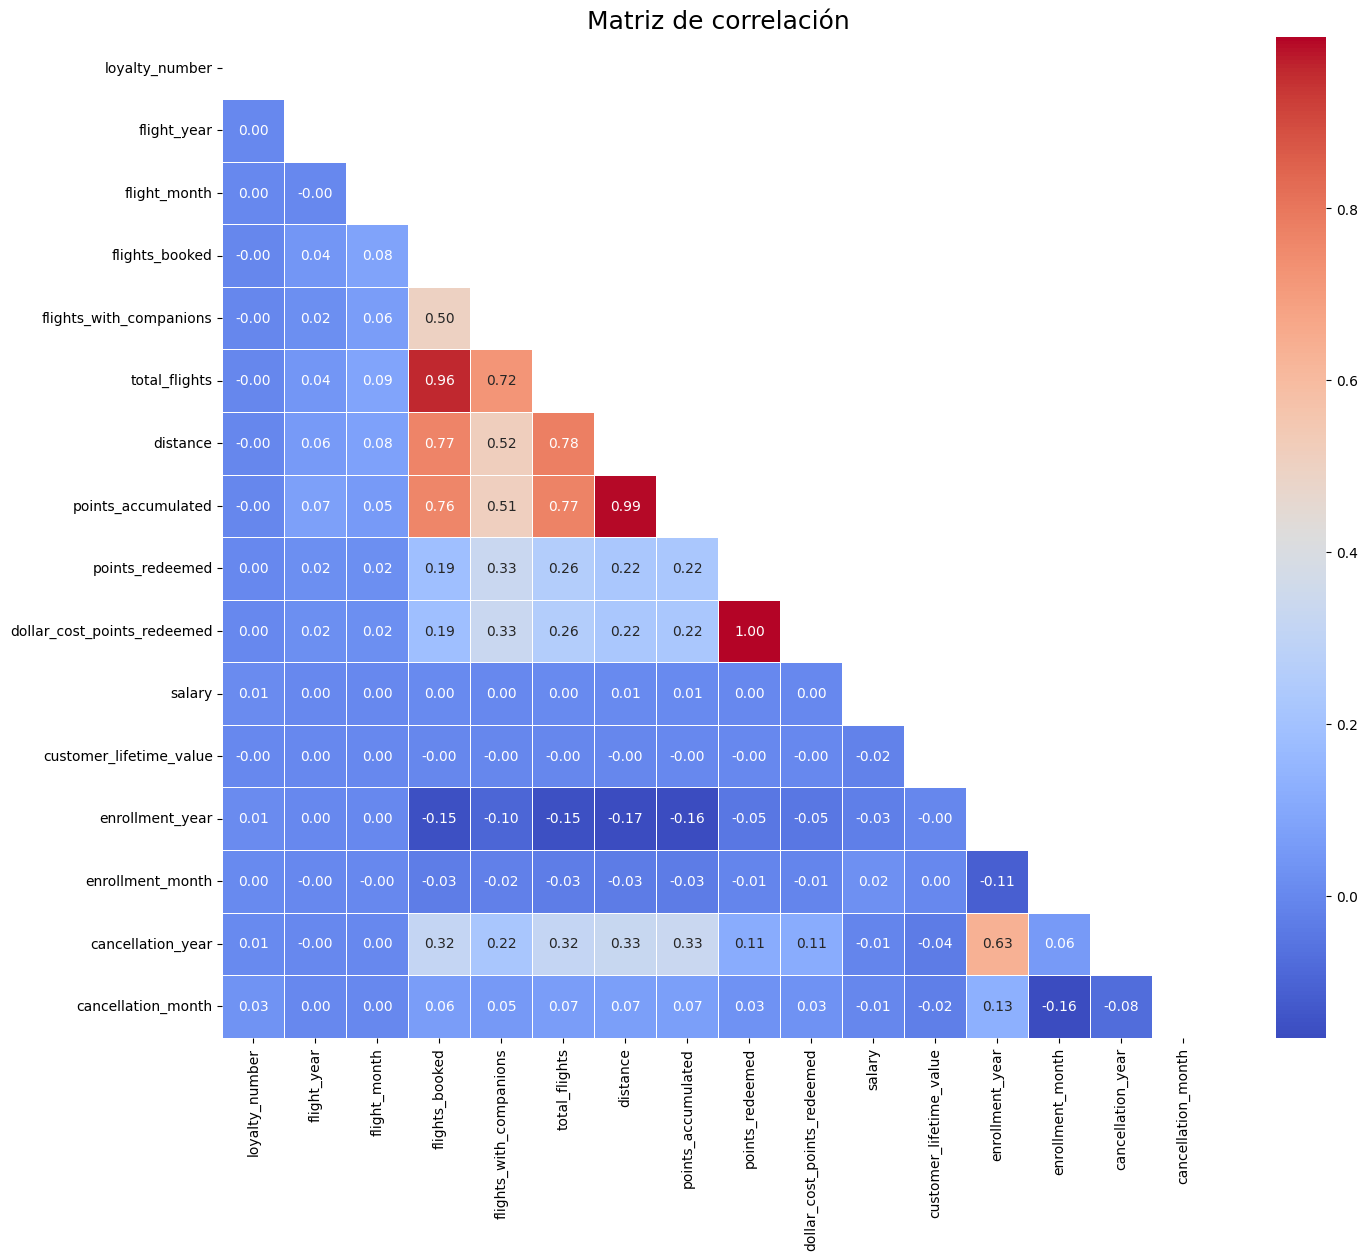

In [32]:
# ==================================================
# MATRIZ DE CORRELACIÓN ENTRE VARIABLES NUMÉRICAS
# Objetivo: analizar la relación lineal entre las variables numéricas
# para identificar posibles dependencias, redundancias o patrones relevantes.
# ==================================================

# Cálculo de la matriz de correlación de Pearson
correlation = df[col_nums].corr()

# Crear una máscara para ocultar la mitad superior (evita duplicados visuales)
mask = np.triu(np.ones_like(correlation, dtype=bool))

# Configuración del tamaño de la figura para mejorar la legibilidad
plt.figure(figsize=(16,13))

# Visualización mediante heatmap
sns.heatmap(
    correlation,
    annot=True,          # mostrar coeficientes numéricos
    cmap="coolwarm",     # escala de colores divergente
    fmt=".2f",           # formato de los coeficientes
    linewidths=0.5,      # separación entre celdas
    mask=mask,           # aplicar máscara
    annot_kws={"size": 10}  # tamaño del texto
)

# Ajuste de la rotación de etiquetas para facilitar la lectura
plt.xticks(rotation=90)
plt.yticks(rotation=0)

# Título del gráfico
plt.title("Matriz de correlación", fontsize=18)

# Mostrar el gráfico
plt.show()

- El análisis de correlación muestra una correlación muy fuerte entre distance y points_accumulated (r ≈ 0.99), lo que confirma que los puntos acumulados dependen directamente de la distancia volada, en línea con la lógica del programa de fidelización. 
- Asimismo, variables como flights_booked, total_flights, distance y points_accumulated presentan correlaciones fuertes entre sí (r ≥ 0.7), lo que indica que una mayor frecuencia de vuelo está asociada a una mayor actividad y acumulación de beneficios.
- Por otro lado, points_redeemed y dollar_cost_points_redeemed presentan una correlación perfecta (r = 1.00), lo cual es coherente, ya que el coste en dólares es una transformación directa de los puntos redimidos.

## **5. ANÁLISIS DE VARIABLES CATEGÓRICAS**

Se analiza la distribución de las variables categóricas relevantes, evaluando la proporción de clientes en cada categoría.

Este análisis permite identificar la composición de la base de clientes según variables como:

- Provincia
- Nivel educativo
- Tipo de tarjeta de fidelización
- Estado civil
- Estado del cliente (activo o cancelado)

Estos resultados ayudan a comprender el perfil demográfico y estructural de los clientes.

In [33]:
def tabla_frecuencias(df, col, sort=True):
    """
    Devuelve una tabla de frecuencias absolutas y relativas (%) 
    para una columna categórica.

    Parámetros
    ----------
    df : pandas.DataFrame
        Dataset de entrada
    col : str
        Nombre de la columna categórica
    sort : bool, opcional (default=True)
        Ordenar por frecuencia absoluta descendente

    Returns
    -------
    pandas.DataFrame
        Tabla con frecuencias absolutas y relativas (%)
    """

    # frecuencia absoluta
    abs_freq = df[col].value_counts()

    # frecuencia relativa (%)
    rel_freq = df[col].value_counts(normalize=True) * 100

    # combinar en un DataFrame
    tabla = pd.DataFrame({
        "Categoria": abs_freq.index,
        "Frecuencia Absoluta": abs_freq.values,
        "Frecuencia Relativa (%)": rel_freq.values.round(2)
    })

    if sort:
        tabla = tabla.sort_values("Frecuencia Absoluta", ascending=False)

    return tabla


In [34]:
cat_vars_relevantes = [
    "province",
    "gender",
    "education",
    "marital_status",
    "loyalty_card",
    "enrollment_type",
    "customer_status"
]

for col in cat_vars_relevantes:
    print(f"\n--- {col.upper()} ---")
    display(tabla_frecuencias(df, col))


--- PROVINCE ---


,Categoria,Frecuencia Absoluta,Frecuencia Relativa (%)
0,Ontario,130258,32.26
1,British Columbia,106442,26.36
2,Quebec,79573,19.71
3,Alberta,23360,5.79
4,Manitoba,15900,3.94
5,New Brunswick,15352,3.80
6,Nova Scotia,12507,3.10
7,Saskatchewan,9861,2.44
8,Newfoundland,6244,1.55
9,Yukon,2679,0.66



--- GENDER ---


,Categoria,Frecuencia Absoluta,Frecuencia Relativa (%)
0,Female,202757,50.22
1,Male,201003,49.78



--- EDUCATION ---


,Categoria,Frecuencia Absoluta,Frecuencia Relativa (%)
0,Bachelor,252567,62.55
1,College,102260,25.33
2,High School Or Below,18915,4.68
3,Doctor,17731,4.39
4,Master,12287,3.04



--- MARITAL_STATUS ---


,Categoria,Frecuencia Absoluta,Frecuencia Relativa (%)
0,Married,234845,58.16
1,Single,108153,26.79
2,Divorced,60762,15.05



--- LOYALTY_CARD ---


,Categoria,Frecuencia Absoluta,Frecuencia Relativa (%)
0,Star,183745,45.51
1,Nova,136883,33.90
2,Aurora,83132,20.59



--- ENROLLMENT_TYPE ---


,Categoria,Frecuencia Absoluta,Frecuencia Relativa (%)
0,Standard,380419,94.22
1,2018 Promotion,23341,5.78



--- CUSTOMER_STATUS ---


,Categoria,Frecuencia Absoluta,Frecuencia Relativa (%)
0,Active,354110,87.7
1,Cancelled,49650,12.3


- Alta concentración geográfica en tres provincias principales: Ontario (32.26%), British Columbia (26.36%) y Quebec (19.71%) concentran conjuntamente el 78.33% del total de clientes.
- Perfil educativo elevado: El 87.88% de los clientes posee educación superior, con Bachelor (62.55%) y College (25.33%) como niveles predominantes.
- Predominio de clientes casados: El 58.16% de los clientes está casado, frente al 26.79% solteros y el 15.05% divorciados, lo que refleja una base con mayor estabilidad demográfica.
- Alta penetración del programa de fidelización: El 79.41% de los clientes pertenece a niveles intermedios o altos del programa de fidelización (Star 45.51%, Nova 33.90%).
- Base mayoritariamente activa y estable: El 87.7% de los clientes se encuentra activo, mientras que el 12.3% ha cancelado, lo que indica una base sólida con un nivel de cancelación moderado.
- Distribución equilibrada por género: La composición es prácticamente equitativa, con 50.22% mujeres y 49.78% hombres, sin sesgos significativos en la representación.

## **6. DISTRIBUCIÓN DE LOS VUELOS RESERVADOS POR MES**

Se analiza cómo se distribuye el número de vuelos reservados a lo largo de los meses, con el objetivo de identificar posibles patrones estacionales o tendencias temporales en la actividad de los clientes.


,flight_year,flight_month,flights_booked,month_name
0,2017,1,47766,Jan
1,2017,2,47691,Feb
2,2017,3,64271,Mar
3,2017,4,55720,Apr
4,2017,5,65279,May
5,2017,6,80493,Jun
6,2017,7,89288,Jul
7,2017,8,78692,Aug
8,2017,9,63304,Sep
9,2017,10,60351,Oct


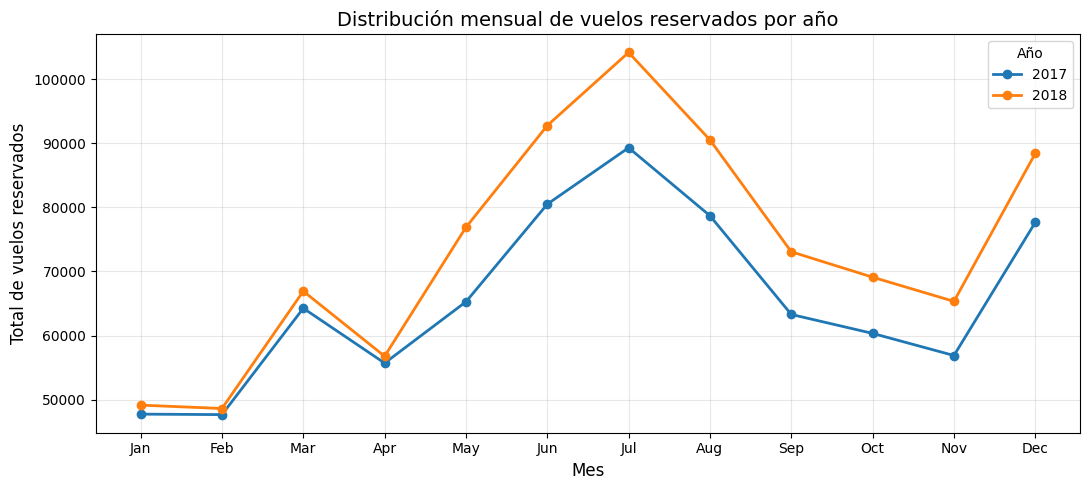

In [35]:
# ------------------------------------------------------------
# 1. Agregación: total de vuelos reservados por año y mes
# ------------------------------------------------------------
# Se agrupan los datos por flight_year y flight_month para
# obtener el volumen total mensual de cada año.

flights_by_month_year = (
    df.groupby(["flight_year", "flight_month"], as_index=False)["flights_booked"]
      .sum()
      .sort_values(["flight_year", "flight_month"])
)


# ------------------------------------------------------------
# 2. Mapeo de número de mes a nombre de mes
# ------------------------------------------------------------
# Mejora la legibilidad de la visualización.

month_map = {
    1: "Jan", 2: "Feb", 3: "Mar", 4: "Apr",
    5: "May", 6: "Jun", 7: "Jul", 8: "Aug",
    9: "Sep", 10: "Oct", 11: "Nov", 12: "Dec"
}

flights_by_month_year["month_name"] = (
    flights_by_month_year["flight_month"].map(month_map)
)


# ------------------------------------------------------------
# 3. Visualización de tabla agregada
# ------------------------------------------------------------

display(flights_by_month_year)


# ------------------------------------------------------------
# 4. Visualización: gráfico de líneas comparativo por año
# ------------------------------------------------------------
# Se representa una línea por cada año para comparar patrones.

plt.figure(figsize=(11, 5))

# iterar sobre cada año
for year in flights_by_month_year["flight_year"].unique():
    
    subset = flights_by_month_year[
        flights_by_month_year["flight_year"] == year
    ]
    
    plt.plot(
        subset["month_name"],
        subset["flights_booked"],
        marker="o",
        linewidth=2,
        label=str(year)
    )


# configuración visual
plt.title("Distribución mensual de vuelos reservados por año", fontsize=14)
plt.xlabel("Mes", fontsize=12)
plt.ylabel("Total de vuelos reservados", fontsize=12)

plt.grid(alpha=0.3)
plt.legend(title="Año")

plt.tight_layout()
plt.show()

- Estacionalidad clara con pico en verano: El mayor volumen de reservas se concentra en julio en ambos años (2017: ~89k, 2018: ~105k), coincidiendo con el periodo vacacional principal.
- Crecimiento interanual consistente: En 2018 se registran más vuelos reservados que en 2017 en todos los meses, lo que indica una expansión sostenida de la actividad.
- Fuerte aceleración entre primavera y verano: El volumen aumenta significativamente entre abril y julio, representando el periodo de mayor crecimiento dentro de cada año.
- Descenso progresivo tras la temporada alta: Después de julio, las reservas disminuyen gradualmente hasta noviembre, reflejando el fin del periodo vacacional principal.
- Repunte relevante en diciembre: Se observa una recuperación clara en diciembre en ambos años, asociada a la temporada navideña, configurando un segundo pico estacional.

## **7. RELACIÓN ENTRE DISTANCIA VOLADA Y PUNTOS ACUMULADOS**

Se evalúa la relación entre la distancia volada por los clientes y los puntos acumulados en el programa de fidelización.

Esta relación es esperable, ya que los puntos suelen asignarse en función de la actividad de vuelo.

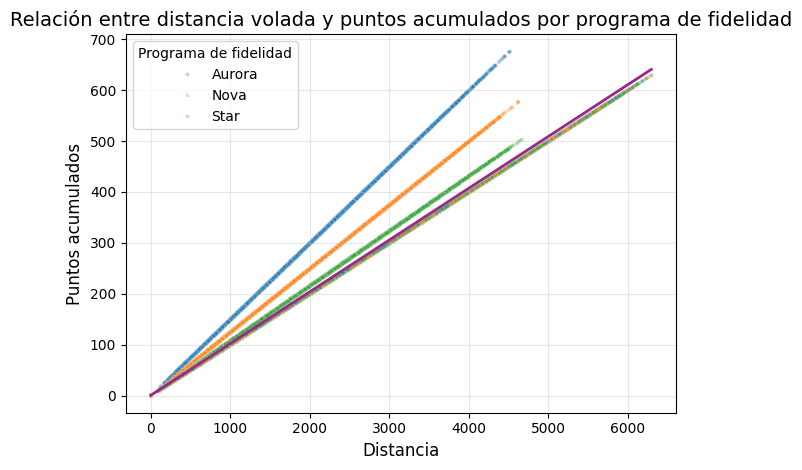

In [36]:
# ------------------------------------------------------------
# 1. Scatter plot coloreado por programa de fidelidad
# ------------------------------------------------------------
# Cada color representa un nivel distinto del programa loyalty_card.

sns.scatterplot(
    data=df,
    x="distance",
    y="points_accumulated",
    hue="loyalty_card",
    alpha=0.3,
    s=8
)

# ------------------------------------------------------------
# 2. Línea de regresión global (opcional, para referencia)
# ------------------------------------------------------------

sns.regplot(
    data=df,
    x="distance",
    y="points_accumulated",
    scatter=False,
    line_kws={"linewidth": 2, "color": "#9B2888"}
)

# ------------------------------------------------------------
# 3. Configuración visual
# ------------------------------------------------------------

plt.title("Relación entre distancia volada y puntos acumulados por programa de fidelidad", fontsize=14)
plt.xlabel("Distancia", fontsize=12)
plt.ylabel("Puntos acumulados", fontsize=12)

plt.legend(title="Programa de fidelidad")
plt.grid(alpha=0.3)
plt.tight_layout()

plt.show()

- Existe una relación lineal positiva clara entre la distancia volada y los puntos acumulados, lo que confirma que los puntos se asignan de forma proporcional a la distancia recorrida.
- La presencia de múltiples líneas diferenciadas por programa de fidelización refleja distintos ratios de acumulación de puntos, asociados a los diferentes niveles del programa o tipos de tarifa, lo que indica que no todos los clientes acumulan puntos al mismo ritmo.

## **8. DISTRIBUCIÓN DE CLIENTES POR PROVINCIA**

Se analiza la distribución de los clientes según su provincia de residencia, lo que permite identificar las regiones con mayor concentración de clientes.


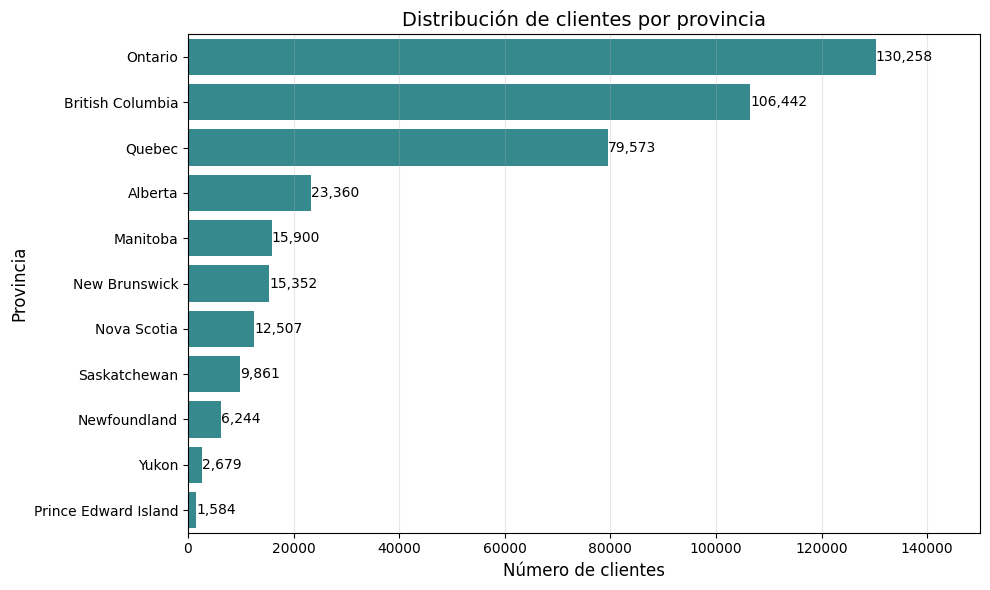

In [37]:
# ------------------------------------------------------------
# 1. Agregación: número de clientes por provincia
# ------------------------------------------------------------
# Se calcula el conteo de clientes en cada provincia y se ordena
# de mayor a menor para facilitar la interpretación.

customers_by_province = (
    df["province"]
    .value_counts()
    .reset_index(name="num_customers")
    .rename(columns={"index": "province"})
)

# ------------------------------------------------------------
# 2. Visualización: gráfico de barras horizontal
# ------------------------------------------------------------
# Este tipo de gráfico permite comparar fácilmente las provincias
# y mejora la legibilidad cuando hay múltiples categorías.

plt.figure(figsize=(10, 6))

ax = sns.barplot(
    data=customers_by_province,
    y="province",
    x="num_customers",
    color="#28969B"
)

for i, value in enumerate(customers_by_province["num_customers"]):
    ax.text(
        value,                  # posición horizontal
        i,                      # posición vertical
        f"{value:,}",           # formato con separador de miles
        va="center",
        fontsize=10)

plt.title("Distribución de clientes por provincia", fontsize=14)
plt.xlabel("Número de clientes", fontsize=12)
plt.ylabel("Provincia", fontsize=12)
plt.xlim(0,150000)

plt.grid(axis="x", alpha=0.3)
plt.tight_layout()

plt.show()

- Alta concentración geográfica en pocas provincias: Ontario (~130k), British Columbia (~106k) y Quebec (~80k) concentran aproximadamente el 78% del total de clientes, constituyendo los principales mercados.
- Ontario representa el principal núcleo de clientes: Con diferencia, Ontario es la provincia con mayor volumen, representando cerca de un tercio de la base total.

## **9. SALARIO PROMEDIO SEGÚN NIVEL EDUCATIVO**

Se analiza el salario promedio de los clientes en función de su nivel educativo.

Este análisis permite identificar posibles diferencias estructurales entre segmentos de clientes.


,education,salary
0,Doctor,178403.675202
1,Master,103734.523724
2,College,73479.000000
3,Bachelor,72666.461687
4,High School Or Below,61162.022892


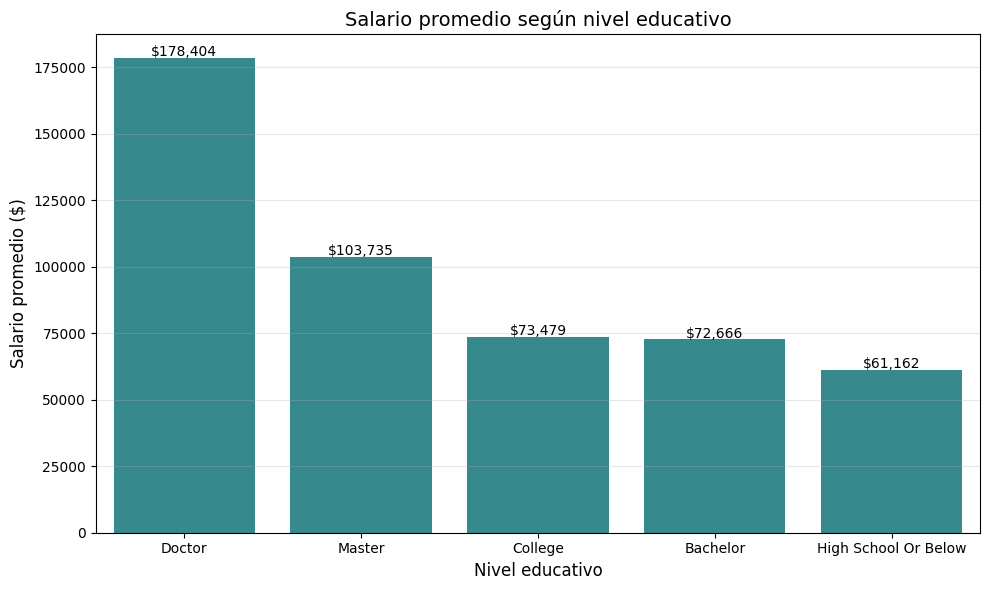

In [38]:
# ============================================================
# 1. Agregación: salario promedio por nivel educativo
# ============================================================

salary_by_education = (
    df.groupby("education")["salary"]
      .mean()
      .sort_values(ascending=False)
      .reset_index()   # ← convierte la Series en DataFrame
)

display(salary_by_education)


# ============================================================
# 2. Visualización: gráfico de barras
# ============================================================

plt.figure(figsize=(10, 6))

ax = sns.barplot(
    data=salary_by_education,
    x="education",
    y="salary",
    color="#28969B"
)


# ============================================================
# 3. Añadir etiquetas de valor
# ============================================================

for i, value in enumerate(salary_by_education["salary"]):
    ax.text(
        i,
        value + 700,
        f"${value:,.0f}",
        ha="center",
        fontsize=10
    )


# ============================================================
# 4. Configuración visual
# ============================================================

plt.title("Salario promedio según nivel educativo", fontsize=14)
plt.xlabel("Nivel educativo", fontsize=12)
plt.ylabel("Salario promedio ($)", fontsize=12)

plt.grid(axis="y", alpha=0.3)
plt.tight_layout()
plt.show()


- Existe una relación positiva clara entre nivel educativo y salario promedio: Los clientes con mayor nivel educativo presentan salarios significativamente superiores, destacando el nivel Doctor con el salario promedio más alto ($178,404).

## **10. DISTRIBUCIÓN DE CLIENTES SEGÚN TIPO DE TARJETA DE FIDELIZACIÓN**

Se evalúa la proporción de clientes en cada categoría del programa de fidelización, lo que permite comprender la estructura del programa y la distribución entre niveles.


loyalty_card
Star      183745
Nova      136883
Aurora     83132
Name: count, dtype: int64

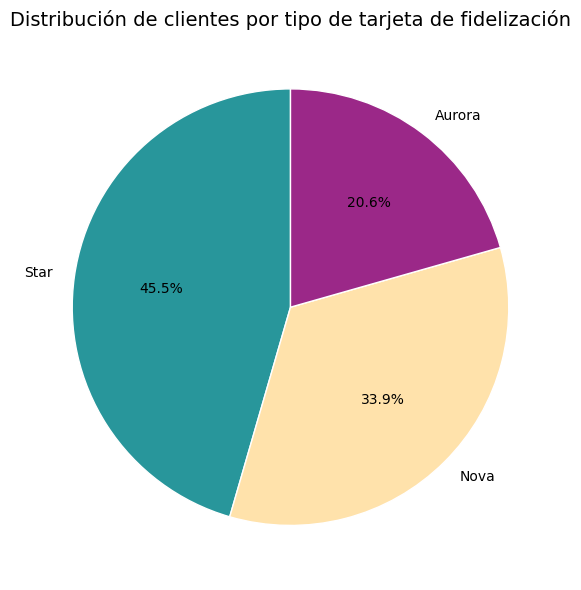

In [39]:
# ------------------------------------------------------------
# 1. Agregación: conteo de clientes por tipo de tarjeta
# ------------------------------------------------------------

loyalty_distribution = (
    df["loyalty_card"]
    .value_counts()
)

display(loyalty_distribution)


# ------------------------------------------------------------
# 2. Visualización: gráfico de pastel (pie chart)
# ------------------------------------------------------------
# Permite visualizar la proporción relativa de cada categoría.

plt.figure(figsize=(6, 6))

plt.pie(
    loyalty_distribution.values,
    labels=loyalty_distribution.index,
    autopct="%1.1f%%",          # mostrar porcentaje
    startangle=90,              # iniciar desde arriba
    colors=["#28969B", "#FFE2AB", "#9B2888"],
    wedgeprops={"edgecolor": "white"}
)

plt.title("Distribución de clientes por tipo de tarjeta de fidelización", fontsize=14)

plt.tight_layout()
plt.show()

- Aurora representa el segmento premium del programa, con menor proporción de clientes (20.6%) pero mayor valor estratégico, al estar asociado a mayores beneficios y potencial de generación de ingresos.
- La mayoría de los clientes se concentra en niveles intermedios (Star y Nova, 79.4%), lo que indica una base fidelizada con margen de progresión hacia el nivel premium.
- Existe una oportunidad clara de negocio en promover la migración hacia Aurora, ya que el aumento de clientes en el nivel premium puede incrementar el engagement, la retención y el valor medio por cliente.

## **11. DISTRIBUCIÓN DE CLIENTES SEGÚN ESTADO CIVIL Y GÉNERO**

Se analiza la composición demográfica de los clientes según su estado civil y género, lo que permite comprender mejor el perfil de la base de clientes.


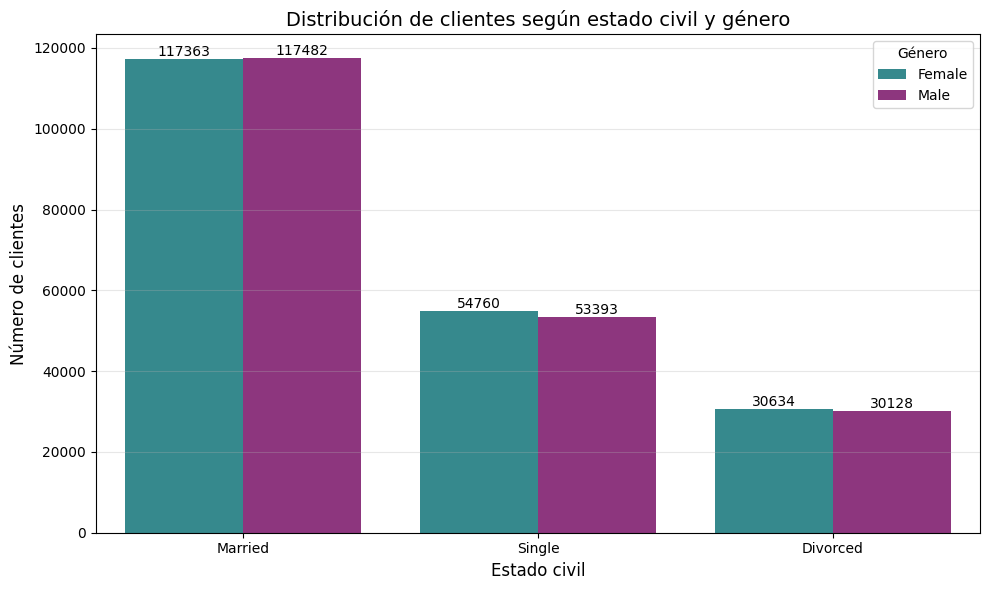

In [40]:
# ------------------------------------------------------------
# 1. Visualización: countplot con segmentación por género
# ------------------------------------------------------------
# Cada barra representa el número de clientes por estado civil,
# y el color diferencia el género.

plt.figure(figsize=(10, 6))

ax = sns.countplot(
    data=df,
    x="marital_status",
    hue="gender",
    palette=["#28969B", "#9B2888"]
)


# ------------------------------------------------------------
# 2. Añadir etiquetas de valor sobre cada barra
# ------------------------------------------------------------
# Se añade el número absoluto de clientes para facilitar
# la interpretación del gráfico.

for container in ax.containers:
    ax.bar_label(container, fmt="%.0f", fontsize=10)


# ------------------------------------------------------------
# 3. Configuración visual
# ------------------------------------------------------------

plt.title("Distribución de clientes según estado civil y género", fontsize=14)
plt.xlabel("Estado civil", fontsize=12)
plt.ylabel("Número de clientes", fontsize=12)

plt.legend(title="Género")
plt.grid(axis="y", alpha=0.3)

plt.tight_layout()
plt.show()

- El segmento predominante es el de clientes casados, con una representación significativamente mayor que el resto de estados civiles, lo que indica una base de clientes más consolidada y estable.
- La distribución por género es altamente equilibrada en todos los estados civiles, sin diferencias relevantes entre hombres y mujeres, lo que sugiere una base de clientes homogénea desde el punto de vista demográfico.
- Los segmentos soltero y divorciado tienen un peso menor pero relevante, representando oportunidades potenciales para estrategias específicas de captación, fidelización o personalización comercial.

## **12. ANÁLISIS DE DIFERENCIAS EN EL NÚMERO DE VUELOS SEGÚN NIVEL EDUCATIVO**

Se analiza si existen diferencias en el número de vuelos reservados entre los distintos niveles educativos.

Para ello, se calculan estadísticas descriptivas por grupo educativo, lo que permite identificar posibles diferencias en el comportamiento de vuelo entre segmentos.


In [41]:
# estadísticas descriptivas agrupadas por education
flights_by_education_stats = (
    df.groupby("education")["flights_booked"]
      .describe()
      .sort_values(by="mean", ascending=False)
)

display(flights_by_education_stats)

,count,mean,std,min,25%,50%,75%,max
education,,,,,,,,
Master,12287.0,4.200700,5.213956,0.0,0.0,1.0,8.0,21.0
High School Or Below,18915.0,4.176209,5.239267,0.0,0.0,1.0,8.0,21.0
Doctor,17731.0,4.175512,5.256971,0.0,0.0,1.0,8.0,21.0
College,102260.0,4.169744,5.246040,0.0,0.0,1.0,8.0,21.0
Bachelor,252567.0,4.110288,5.221671,0.0,0.0,1.0,8.0,21.0


- No existen diferencias relevantes en el número promedio de vuelos según el nivel educativo, ya que todos los grupos presentan valores muy similares, con medias en torno a los 4.1–4.2 vuelos.
- El comportamiento de vuelo es altamente consistente entre segmentos educativos, lo que indica que el nivel educativo no actúa como un factor diferenciador significativo en la frecuencia de vuelo.